# Twitter and Reddit Sentimental analysis

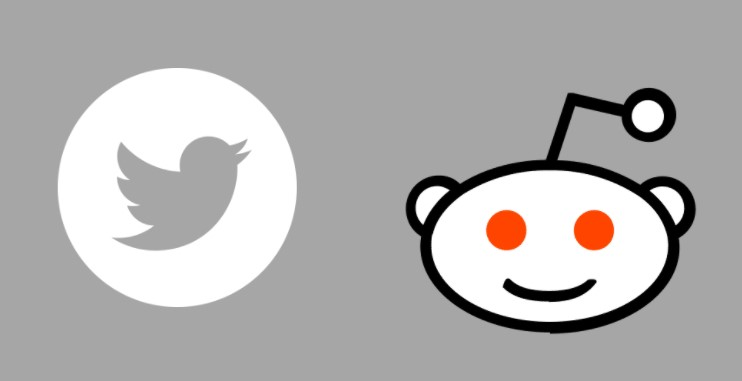


## Context

There two datasets Respectively one Consists of Tweets from Twitter with Sentimental Label and the other from Reddit which Consists of Comments with its Sentimental Label.

  1. Twitter Dataset
  2. Reddit Dataset

All these Tweets and Comments were extracted using there Respective Apis Tweepy and PRAW.
These tweets and Comments Were Made on Narendra Modi and Other Leaders as well as Peoples Opinion Towards the Next Prime Minister of The Nation ( In Context with General Elections Held In India - 2019).
All the Tweets and Comments From twitter and Reddit are Cleaned using Pythons re and also NLP with a Sentimental Label to each ranging from -1 to 1.

          1.  0 Indicating it is a Neutral Tweet/Comment
          2.  1 Indicating a Postive Sentiment
          3. -1 Indicating a Negative Tweet/Comment
          

## Content

* Twitter.csv Dataset has around 163K Tweets along with Sentiment Labels.
* Reddit.csv Dataset has around 37K Comments along with its Sentimental Label

So Generally Each Dataset has two columns, the first column has the cleaned tweets and Comments and the Second one indicates its Sentimental Label


## Data Source

https://www.kaggle.com/cosmos98/twitter-and-reddit-sentimental-analysis-dataset

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from bs4 import BeautifulSoup
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.corpus import stopwords 
from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [2]:
twitter = pd.read_csv("Twitter_Data.csv")
reddit  = pd.read_csv("Reddit_Data.csv")

In [3]:
twitter.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
print('Twitter Data Shape :', twitter.shape)
print('Reddit Data Shape  :', reddit.shape)

Twitter Data Shape : (162980, 2)
Reddit Data Shape  : (37249, 2)


In [5]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [6]:
twitter['category'].value_counts()

 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64

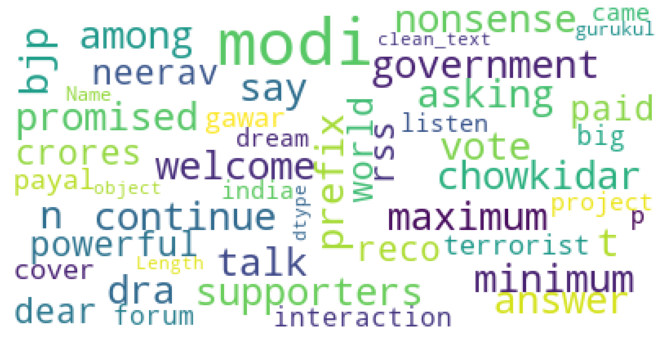

In [7]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 162980, max_font_size = 40, scale = 1, 
                          random_state = 42).generate(str(data))

    fig = plt.figure(1, figsize = (20,6))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(twitter['clean_text'])

In [8]:
twitter['clean_text'] = twitter['clean_text'].astype("str").astype("string")

In [9]:
twitter['clean_text'][0]

'when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'

## PreProcessing of Text

### Text Normalization

### Removing Html Strips & Noise Text

In [10]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)


#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
twitter['cleaned_text'] = twitter['clean_text'].apply(denoise_text)

In [11]:
twitter.head()

,clean_text,category,cleaned_text
0,when modi promised “minimum government maximum...,-1.0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...


### Removing Special Characters

In [12]:
def remove_special_characters(text, remove_digits = True):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

#Apply function on review column
twitter['cleaned_text'] = twitter['cleaned_text'].apply(remove_special_characters)

In [13]:
twitter.head()

,clean_text,category,cleaned_text
0,when modi promised “minimum government maximum...,-1.0,when modi promised minimum government maximum ...
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...


### Tokenization

In [14]:
tokenizer = ToktokTokenizer()

stopword_list = nltk.corpus.stopwords.words('english')

### Stemming

In [15]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

twitter['cleaned_text'] = twitter['cleaned_text'].apply(simple_stemmer)

In [16]:
twitter.head()

,clean_text,category,cleaned_text
0,when modi promised “minimum government maximum...,-1.0,when modi promis minimum govern maximum govern...
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsens and continu all the drama...
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcom bjp tol...
3,asking his supporters prefix chowkidar their n...,1.0,ask hi support prefix chowkidar their name mod...
4,answer who among these the most powerful world...,1.0,answer who among these the most power world le...


### Removing Stopwords

In [17]:
stop = set(stopwords.words('english'))

def remove_stopwords(text, is_lower_case = False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


twitter['cleaned_text'] = twitter['cleaned_text'].apply(remove_stopwords)

In [18]:
twitter.head()

,clean_text,category,cleaned_text
0,when modi promised “minimum government maximum...,-1.0,modi promis minimum govern maximum govern expe...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsens continu drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcom bjp told rahul main campa...
3,asking his supporters prefix chowkidar their n...,1.0,ask hi support prefix chowkidar name modi grea...
4,answer who among these the most powerful world...,1.0,answer among power world leader today trump pu...


### Lemmatisation

In [19]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer  = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

twitter['cleaned_text'] = twitter['cleaned_text'].apply(lemmatize_text)

In [20]:
twitter.head()

,clean_text,category,cleaned_text
0,when modi promised “minimum government maximum...,-1.0,"[modi, promis, minimum, govern, maximum, gover..."
1,talk all the nonsense and continue all the dra...,0.0,"[talk, nonsens, continu, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,1.0,"[say, vote, modi, welcom, bjp, told, rahul, ma..."
3,asking his supporters prefix chowkidar their n...,1.0,"[ask, hi, support, prefix, chowkidar, name, mo..."
4,answer who among these the most powerful world...,1.0,"[answer, among, power, world, leader, today, t..."


In [21]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   clean_text    162980 non-null  string 
 1   category      162973 non-null  float64
 2   cleaned_text  162980 non-null  object 
dtypes: float64(1), object(1), string(1)
memory usage: 3.7+ MB


In [22]:
twitter['cleaned_text'] = twitter['cleaned_text'].astype("str").astype("string")

### Polarity

In [23]:
twitter['sentiment'] = twitter['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
twitter.head()

,clean_text,category,cleaned_text,sentiment
0,when modi promised “minimum government maximum...,-1.0,"['modi', 'promis', 'minimum', 'govern', 'maxim...",-0.500000
1,talk all the nonsense and continue all the dra...,0.0,"['talk', 'nonsens', 'continu', 'drama', 'vote'...",0.000000
2,what did just say vote for modi welcome bjp t...,1.0,"['say', 'vote', 'modi', 'welcom', 'bjp', 'told...",0.166667
3,asking his supporters prefix chowkidar their n...,1.0,"['ask', 'hi', 'support', 'prefix', 'chowkidar'...",0.450000
4,answer who among these the most powerful world...,1.0,"['answer', 'among', 'power', 'world', 'leader'...",0.000000


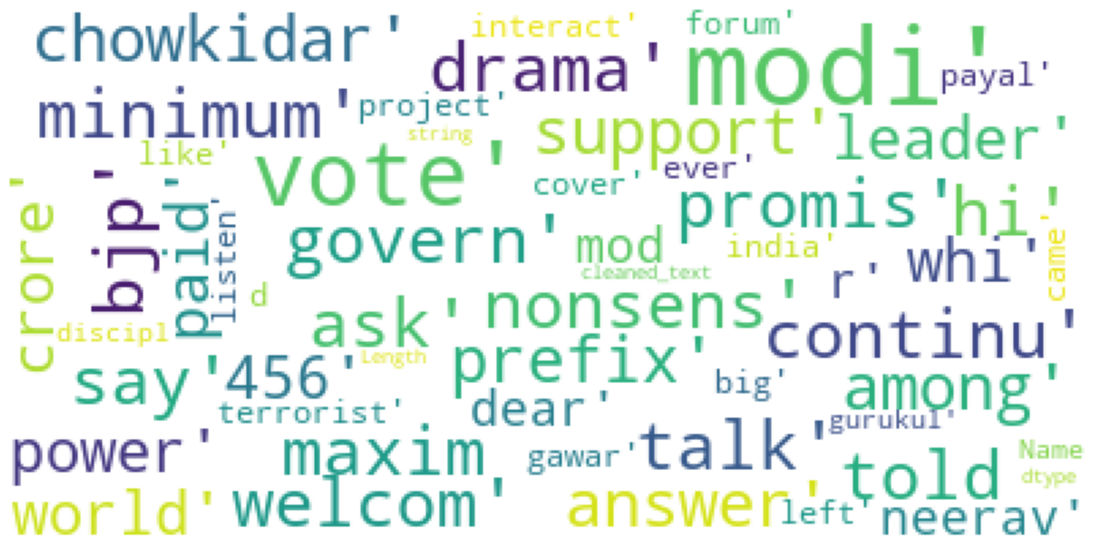

In [24]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 16000, max_font_size = 40, scale = 1, 
                          random_state = 42).generate(str(data))

    fig = plt.figure(1, figsize = (20,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(twitter['cleaned_text'])

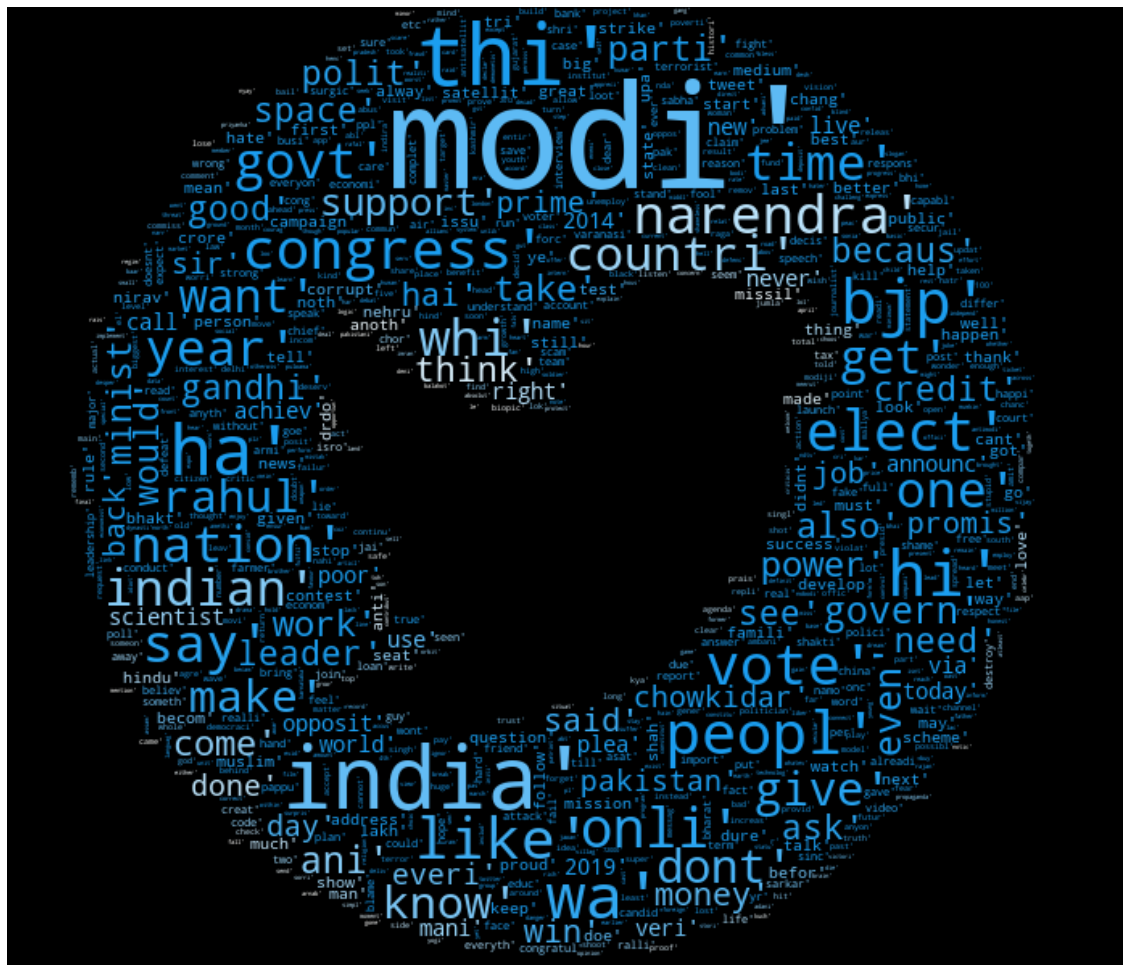

In [25]:
stopwords = set(STOPWORDS)
mask = np.array(Image.open(r"D:\Projects\Twitter and Reddit Sentimental analysis Dataset\02.JPG"))
wordcloud = WordCloud(width = 3000, height = 2000, random_state = 1, background_color = 'black', colormap = 'Set2', 
                      collocations = False, mode = "RGBA", max_words = 4000, 
                      mask = mask).generate(' '.join(twitter['cleaned_text']))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize = [20,20])
plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation = "bilinear")
plt.axis("off") 
plt.show()

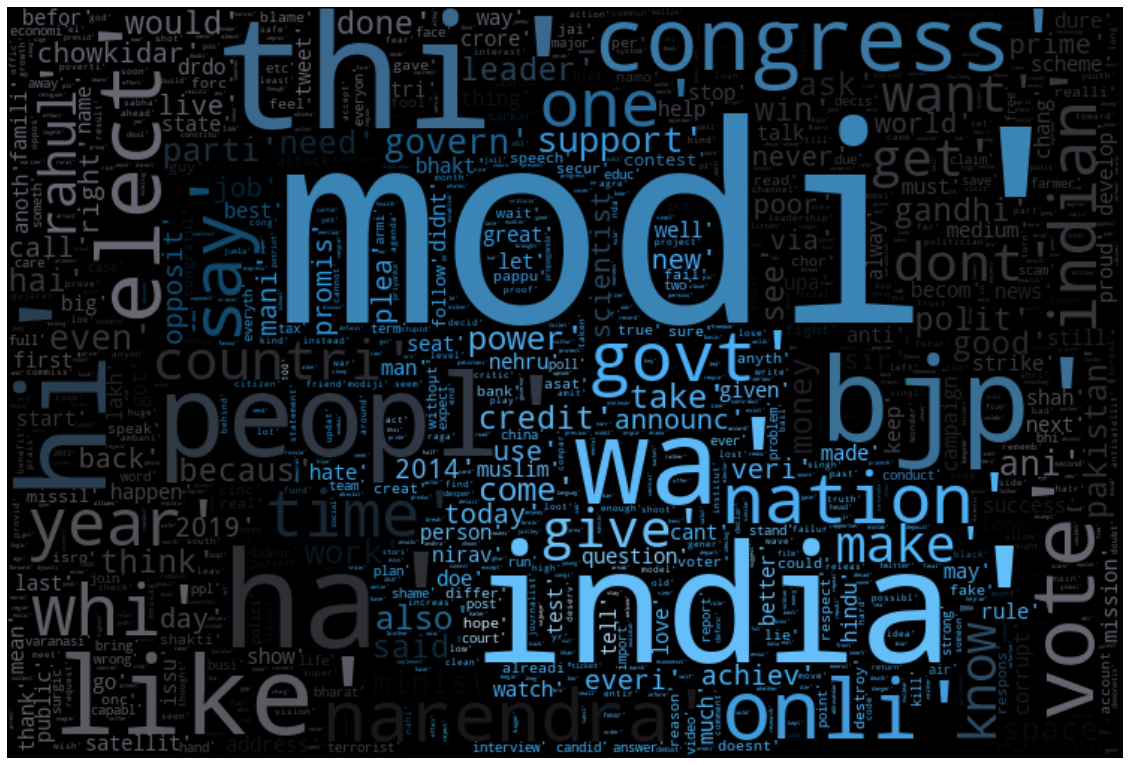

In [26]:
stopwords = set(STOPWORDS)
mask = np.array(Image.open(r"D:\Projects\Twitter and Reddit Sentimental analysis Dataset\03.JPG"))
wordcloud = WordCloud(width = 3000, height = 2000, random_state = 1, background_color = 'black', colormap = 'Set2', 
                      collocations = False, mode = "RGBA", max_words = 4000, 
                      mask = mask).generate(' '.join(twitter['cleaned_text']))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize = [20,20])
plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation = "bilinear")
plt.axis("off") 
plt.show()

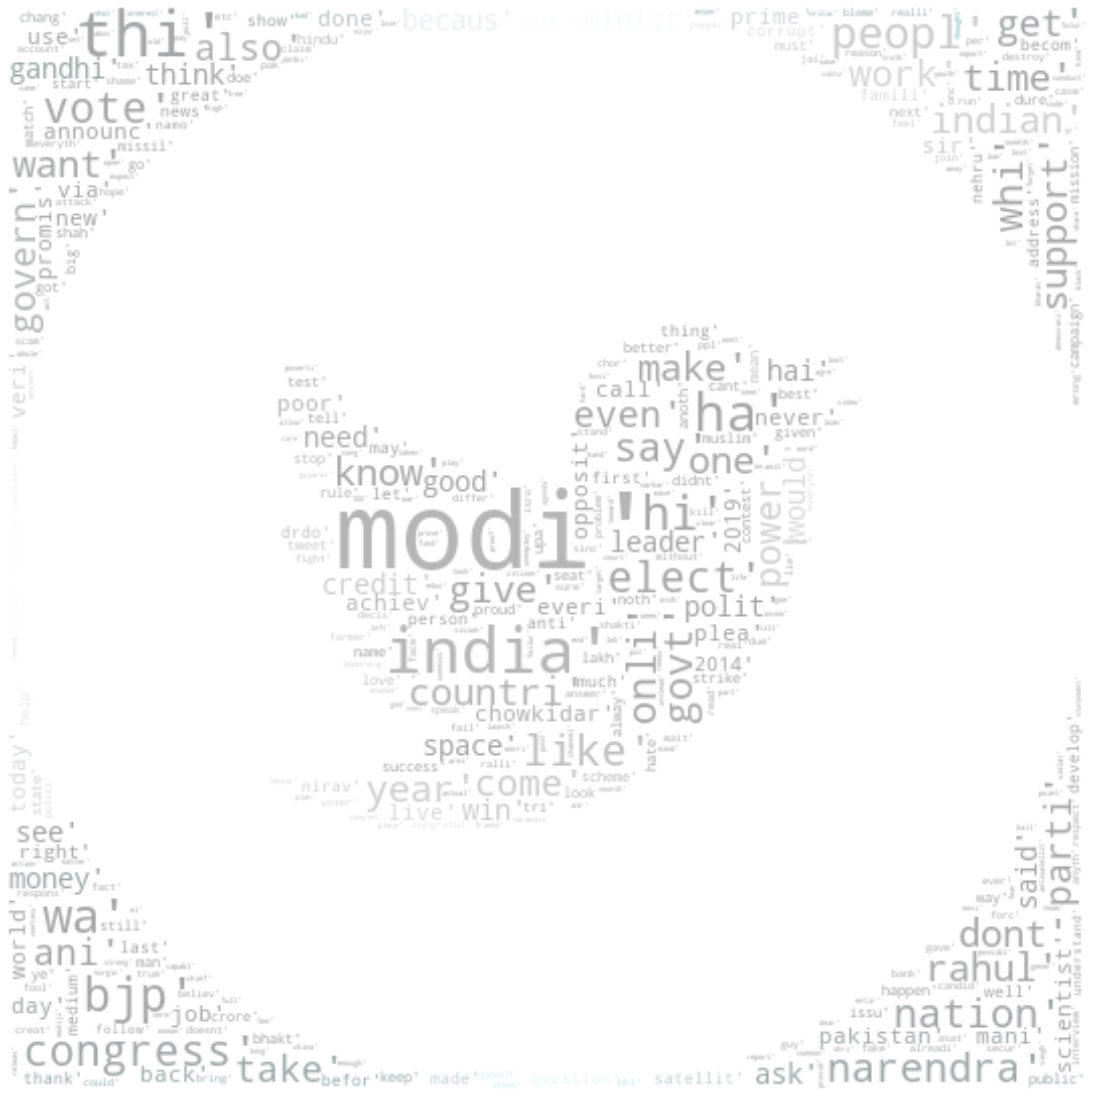

In [27]:
stopwords = set(STOPWORDS)
mask = np.array(Image.open(r"D:\Projects\Twitter and Reddit Sentimental analysis Dataset\05.JPG"))
wordcloud = WordCloud(width = 3000, height = 2000, random_state = 1, background_color = 'white', colormap = 'Set2', 
                      collocations = False, mode = "RGBA", max_words = 4000, 
                      mask = mask).generate(' '.join(twitter['cleaned_text']))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize = [20,20])
plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation = "bilinear")
plt.axis("off") 
plt.show()

In [28]:
twitter.head()

,clean_text,category,cleaned_text,sentiment
0,when modi promised “minimum government maximum...,-1.0,"['modi', 'promis', 'minimum', 'govern', 'maxim...",-0.500000
1,talk all the nonsense and continue all the dra...,0.0,"['talk', 'nonsens', 'continu', 'drama', 'vote'...",0.000000
2,what did just say vote for modi welcome bjp t...,1.0,"['say', 'vote', 'modi', 'welcom', 'bjp', 'told...",0.166667
3,asking his supporters prefix chowkidar their n...,1.0,"['ask', 'hi', 'support', 'prefix', 'chowkidar'...",0.450000
4,answer who among these the most powerful world...,1.0,"['answer', 'among', 'power', 'world', 'leader'...",0.000000


### Count The Negative, Neutral, and Positive Comments

In [29]:
negative_count = [len(twitter[twitter.category == -1])]
neutral_count  = [len(twitter[twitter.category == 0])]
positive_count = [len(twitter[twitter.category == 1])]

x = ['Twitter']
x_indexes = np.arange(len(x))
width = 0.25

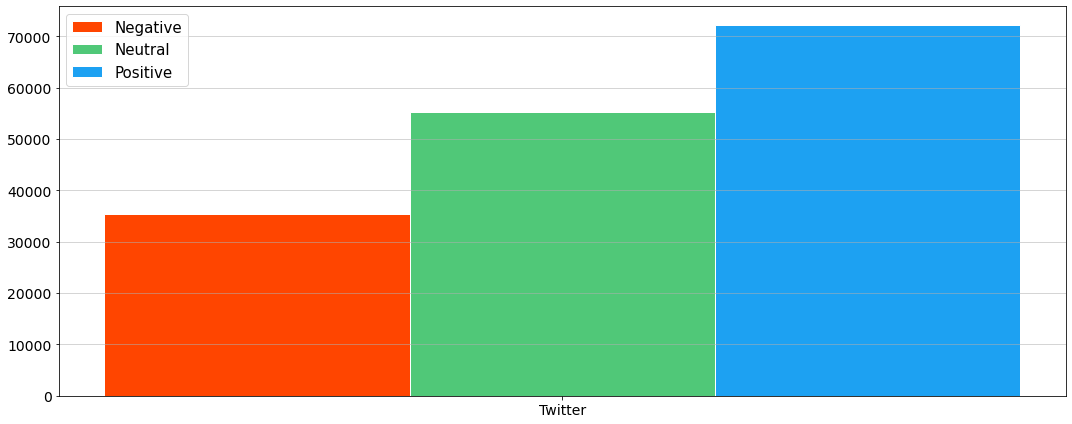

In [30]:
plt.figure(figsize = (15,6))

plt.bar(x_indexes - width, negative_count, width = width, label = 'Negative', edgecolor = 'white', color = '#ff4500')
plt.bar(x_indexes,         neutral_count,  width = width, label = 'Neutral',  edgecolor = 'white', color = '#50C878')
plt.bar(x_indexes + width, positive_count, width = width, label = 'Positive', edgecolor = 'white', color = '#1DA1F2')

plt.yticks(fontsize = 14)
plt.xticks(ticks = x_indexes, labels = x, fontsize = 14)

plt.legend(prop = {'size':15})
plt.grid(axis = 'y', alpha = 0.65)
plt.tight_layout()

### Create Word Clouds to See Which Words Appear Frequently

In [31]:
negative_words = ''
neutral_words  = ''
positive_words = ''

stopwords = set(STOPWORDS)

for comment, category in zip(twitter.cleaned_text, twitter.category):
    tokens = comment.split()
    
    for word in tokens:
        if category == -1:
            negative_words += word + ' '
        elif category == 0:
            neutral_words += word + ' '
        else:
            positive_words += word + ' '

In [32]:
negative_cloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, 
                           min_font_size = 10).generate(negative_words)

neutral_cloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, 
                          min_font_size = 10).generate(neutral_words)

positive_cloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, 
                           min_font_size = 10).generate(positive_words)

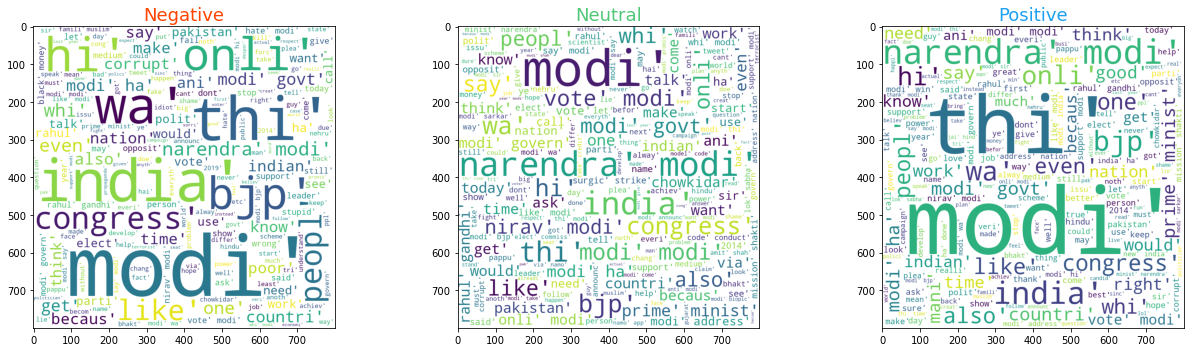

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5), facecolor = None)

ax1.imshow(negative_cloud)
ax1.set_title('Negative', fontsize = 18, color = '#ff4500')

ax2.imshow(neutral_cloud)
ax2.set_title('Neutral', fontsize = 18, color = '#50C878')

ax3.imshow(positive_cloud)
ax3.set_title('Positive', fontsize = 18, color = '#1DA1F2')

plt.tight_layout()

### Split Test & Train Data

* Balance the Data (The Amount of Negative, Neutral, and Positive Data Must be Equivalent)

In [34]:
class Data:
    def __init__(self, df):
        self.df = df
        
    def fixData(self):
        dataframe = self.df
        lowest_len = min([i for i in dataframe.category.value_counts()])
        
        # Create the final data frame
        final_df = pd.concat([dataframe[dataframe.category == -1][:lowest_len],
                             dataframe[dataframe.category  == 0][:lowest_len],
                             dataframe[dataframe.category  == 1][:lowest_len]])
        
        # To shuffle the rows in the data frame
        final_df = final_df.sample(frac = 1).reset_index(drop = True)
        return final_df

In [35]:
a = Data(twitter)
fixed_df = a.fixData()
print(f'Before: \n{twitter.category.value_counts()}\n')
print(f'After : \n{twitter.category.value_counts()}')

Before: 
 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64

After : 
 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64


In [36]:
train_X, test_X, train_y, test_y = train_test_split([i for i in fixed_df.cleaned_text], 
                                                    [i for i in fixed_df.category], test_size = 0.25, random_state = 1)

### Vectorize the Comment

In [37]:
vectorizer = TfidfVectorizer()
train_X_vectors = vectorizer.fit_transform(train_X)
test_X_vectors = vectorizer.transform(test_X)

### Creating Models

### Linear SVC

In [38]:
clf_svm = LinearSVC()
clf_svm.fit(train_X_vectors, train_y)
clf_prediction = clf_svm.predict(test_X_vectors)

print(f'Accuracy: {clf_svm.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, clf_prediction, average = None, labels = [-1, 0, 1])}')

Accuracy: 0.8447790335298314
Accuracy: [0.83576189 0.86009062 0.83777043]


### MultinomialNB

In [39]:
svm_mnb = MultinomialNB()
svm_mnb.fit(train_X_vectors, train_y)
mnb_prediction = svm_mnb.predict(test_X_vectors)

print(f'Accuracy: {svm_mnb.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, mnb_prediction, average = None, labels = [-1, 0, 1])}')

Accuracy: 0.68058423759997
Accuracy: [0.70398619 0.63481181 0.68976552]


### Decision Tree Classifier

In [40]:
svm_dtc = DecisionTreeClassifier()
svm_dtc.fit(train_X_vectors, train_y)
dtc_prediction = svm_dtc.predict(test_X_vectors)

print(f'Accuracy: {svm_dtc.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, dtc_prediction, average = None, labels = [-1, 0, 1])}')

Accuracy: 0.7554913077760673
Accuracy: [0.72618774 0.80157019 0.73731057]


### Random Forest Classifier

In [41]:
svm_rfc = RandomForestClassifier()
svm_rfc.fit(train_X_vectors, train_y)
rfc_prediction = svm_rfc.predict(test_X_vectors)

print(f'Accuracy: {svm_rfc.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, rfc_prediction, average = None, labels = [-1, 0, 1])}')

Accuracy: 0.8002853602673375
Accuracy: [0.78208178 0.8258585  0.79071987]
